# Random Quadtree Tutorial

This short tutorial covers the most basic functionality of `astroQTpy` quadtrees. Here we will generate a simple quadtree map containing random points. We recommend this tutorial as a starting point to get familiar with how the package works before moving on to other tutorials or implementing `astroQTpy` in your own research.

### Getting started

First, import `RandomQuadTree` from the `quadtree` module.

In [1]:
from astroqtpy.quadtree import RandomQuadTree

The first step with any `astroQTpy` quadtree is to create an instance of the quadtree class you want to use. For this tutorial, let's create a new instance of `RandomQuadTree`. This requires specifying only four inputs: the minimum and maximum x and y values of the parameter space we wish to explore. Let's arbitrarily go with $0 < x < 10$ and $0 < y < 10$. 

The `RandomQuadTree` class also takes several optional arguments, which you can read more about in the detailed API. For now, we'll only change the names of the output files where we'll save the quadtree from their default values.

In [2]:
random_tree = RandomQuadTree(0, 10, 0, 10,
                             filename_points='./tutorial_outputs/randomtree_points.txt',
                             filename_nodes='./tutorial_outputs/randomtree_nodes.txt'
                             )

Now all we have to do is tell our `RandomQuadTree` instance to run by executing the `run_quadtree` method!

`astroQTpy` will automatically attempt to load any previously saved results before starting a new run. By default, the code will begin with a 4x4 grid of nodes, filling each one with 20 points spaced uniformly in x and y. Each point contains a value of either 1 or 0. Then, the mean (default) value of each node is computed and compared to each neighboring node. If the average differs from a neighboring node by more than 0.2 (default), the node divides itself into four equal "child" nodes, which will inherit the points contained in the "parent" node. This continues up to a maximum grid size of 32x32 (default). By default, `astroQTpy` will run on a single core, but can optionally compute many points within a node in parallel for more computationally demanding projects.

In [3]:
random_tree.run_quadtree()

Attempting to load previous results...
   No previous results found, starting new...
DONE! :)


### Plotting the quadtree

`astroQTpy` has a built-in plotting routine to allow you to conveniently visualize the quadtree. All we need to do is call the `draw_tree` method, which returns a Matplotlib ScalarMappable object that we can use to generate a colorbar. We can optionally choose to display all the points contained in each node, the lines defining the boundaries of each node, and text strings showing the value of each node.

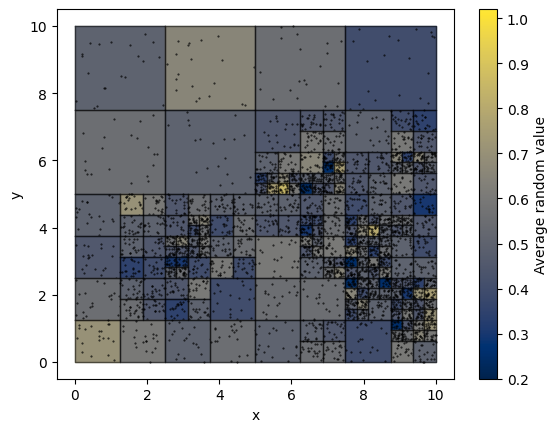

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
quadtree_map = random_tree.draw_tree(ax, show_points=True, cmap='cividis')
plt.colorbar(quadtree_map, ax=ax, label='Average random value')
ax.set_ylabel('y')
ax.set_xlabel('x'); 